# Capstone Project 1
# House price prediction
data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data_directory = 'Data/train.csv'
df = pd.read_csv(data_directory)
df.shape

(1460, 81)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
df['LotConfig'].head(25)

0      Inside
1         FR2
2      Inside
3      Corner
4         FR2
5      Inside
6      Inside
7      Corner
8      Inside
9      Corner
10     Inside
11     Inside
12     Inside
13     Inside
14     Corner
15     Corner
16    CulDSac
17     Inside
18     Inside
19     Inside
20     Corner
21     Inside
22     Inside
23     Inside
24     Inside
Name: LotConfig, dtype: object

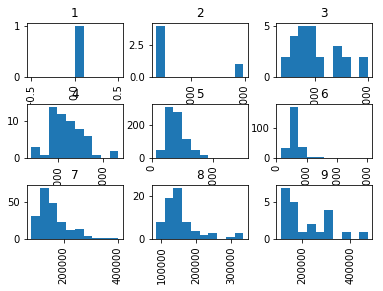

In [26]:
#can I create a histogram of sales price defined by different overallcond?
df_new = df.loc[:,['OverallCond', 'SalePrice']]
df_new['SalePrice'].hist(by = df_new['OverallCond'])
plt.show()
#df['SalePrice'].head(25)